# Model

Transformer ban đầu được đề xuất cho học chuỗi đến chuỗi và đã trở thành mô hình chính trong nhiều tác vụ xử lý ngôn ngữ tự nhiên. Trong lĩnh vực thị giác máy tính, CNN vẫn là kiến trúc chủ đạo, nhưng các nhà nghiên cứu bắt đầu thử nghiệm với việc áp dụng Transformer cho dữ liệu hình ảnh. Ramachandran et al. (2019) đã đề xuất thay thế convolution bằng self-attention, nhưng gặp khó khăn về khả năng mở rộng. Cordonnier et al. (2020) chứng minh rằng self-attention có thể hoạt động như convolution. Vision Transformers (ViTs) trích xuất các miếng nhỏ từ hình ảnh và sử dụng Transformer để phân loại, cho thấy khả năng mở rộng tốt hơn CNNs, đặc biệt khi huấn luyện trên các mô hình lớn hơn và dữ liệu lớn hơn, vượt qua ResNets. Transformers đã trở thành bước đột phá trong thị giác máy tính giống như trong xử lý ngôn ngữ tự nhiên.

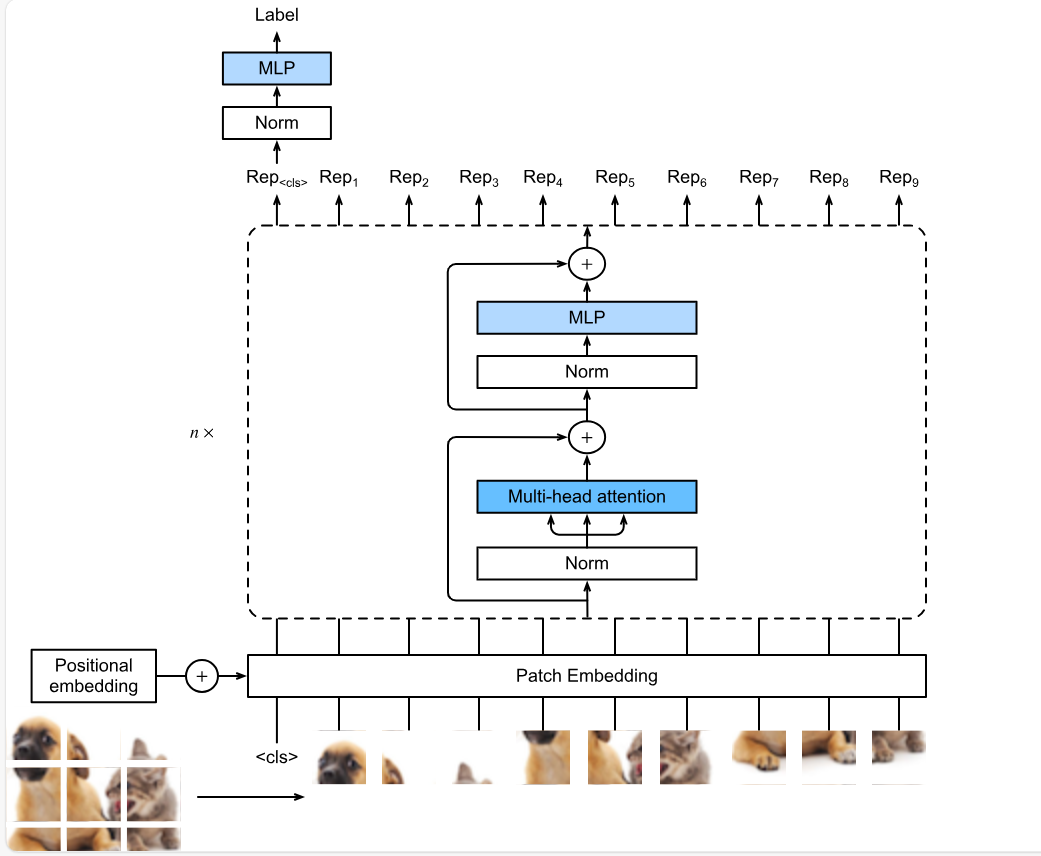

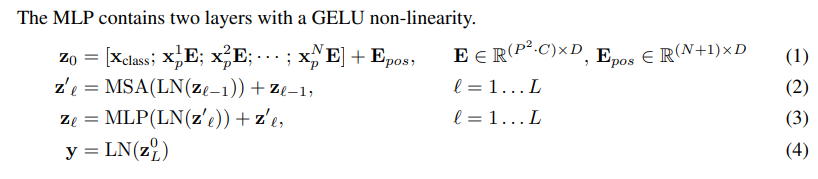

Xclass : **' <c l  .s >'**   similar BERT’s





theo https://datascience.stackexchange.com/questions/90649/class-token-in-vit-and-bert : Theo hiểu biết tốt nhất của tôi, mã thông báo này được sử dụng để thu thập kiến ​​thức của toàn bộ lớp và sau đó chỉ được sử dụng để dự đoán lớp của hình ảnh.

Or apply the classification layer on one items of the output sequence, but which one?! The best answer here is none of them! We don't want to be biased toward any of the patches. So the best solution here is to add a dummy input, call it class token and apply the classification layer on the corresponding output item!

[Hoặc áp dụng lớp phân loại cho một mục của chuỗi đầu ra, nhưng mục nào?! Câu trả lời tốt nhất ở đây không phải là câu trả lời nào cả! Chúng tôi không muốn thiên vị bất kỳ bản vá nào. Vì vậy, giải pháp tốt nhất ở đây là thêm đầu vào giả, gọi nó là mã thông báo lớp và áp dụng lớp phân loại trên mục đầu ra tương ứng!]

https://datascience.stackexchange.com/questions/66207/what-is-purpose-of-the-cls-token-and-why-is-its-encoding-output-important

[CLS] là viết tắt của phân loại. Nó được thêm vào ngay từ đầu vì nhiệm vụ huấn luyện ở đây là phân loại câu. Và bởi vì họ cần đầu vào có thể thể hiện ý nghĩa của toàn bộ câu nên họ giới thiệu một thẻ mới. Họ không thể lấy bất kỳ từ nào khác từ chuỗi đầu vào, bởi vì đầu ra của chuỗi đó là cách biểu diễn từ. Vì vậy, họ thêm một thẻ không có mục đích nào khác ngoài việc thể hiện cấp độ câu để phân loại.

https://datasciencetoday.net/index.php/en-us/nlp/211-paper-dissected-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-explained

As I mentioned earlier, the BERT encoder produces a sequence of hidden states. For classification tasks, this sequence ultimately needs to be reduced to a single vector. There are multiple ways of converting this sequence to a single vector representation of a sentence. One is max/mean pooling. Another is applying attention. The authors, however, opt to go with a much simpler method: simply taking the hidden state corresponding to the first token. [Như tôi đã đề cập trước đó, bộ mã hóa BERT tạo ra một chuỗi các trạng thái ẩn. Đối với các nhiệm vụ phân loại, chuỗi này cuối cùng cần được giảm xuống thành một vectơ duy nhất. Có nhiều cách để chuyển đổi chuỗi này thành một biểu diễn vectơ duy nhất của một câu. Một là gộp tối đa/trung bình. Một cách khác là áp dụng sự chú ý. Tuy nhiên, các tác giả chọn sử dụng một phương pháp đơn giản hơn nhiều: chỉ cần lấy trạng thái ẩn tương ứng với mã thông báo đầu tiên.] x

To make this pooling scheme work, BERT prepends a [CLS] token (short for “classification”) to the start of each sentence (this is essentially like a start-of-sentence token). [Để làm cho sơ đồ tổng hợp này hoạt động, BERT thêm mã thông báo [CLS] (viết tắt của “phân loại”) vào đầu mỗi câu (về cơ bản, mã thông báo này giống như mã thông báo bắt đầu câu).] x

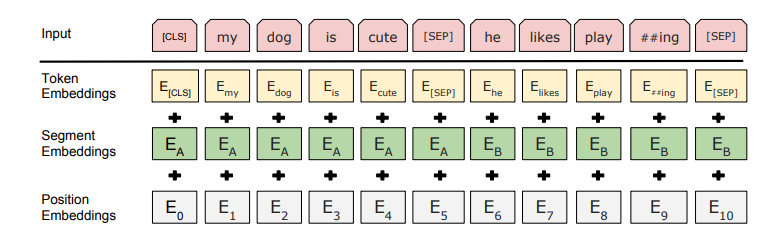

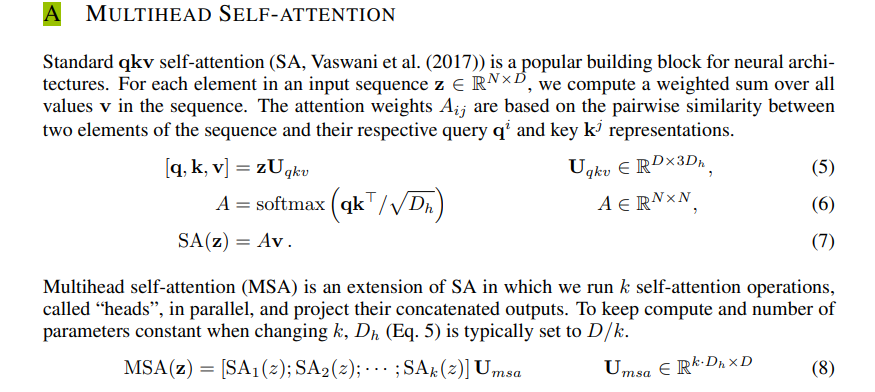

Chia hình ảnh thành 9 miếng và trải phẳng + <cls> thành 10 đầu vào



Các bản vá được tính theo :

Với H là chiều cao, W là chiều rộng và 𝑐 kênh

Chỉ định chiều cao và chiều rộng của miếng vá là 𝑝 , hình ảnh được chia thành một chuỗi 𝑚 = ℎ 𝑤 / 𝑝 2 miếng vá, trong đó mỗi miếng vá được làm phẳng thành một vectơ có chiều dài 𝑐 𝑝 2 .

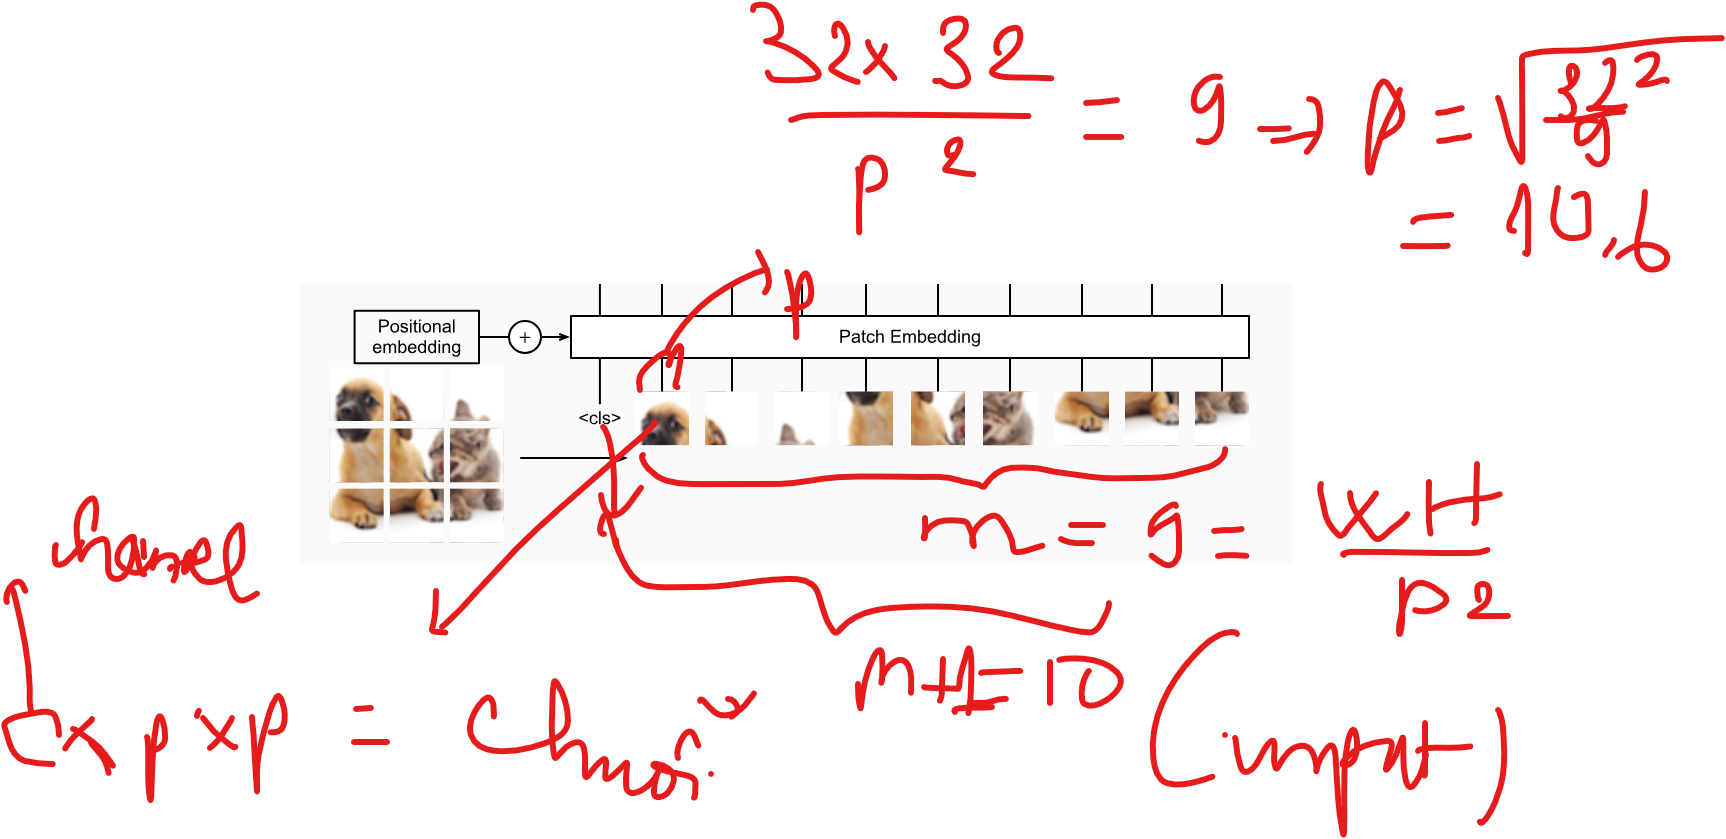

Theo như chttps://arxiv.org/pdf/2010.11929 trình bày :

 Dịch nội dung:

Vision Transformer (ViT) là một biến thể của mô hình Transformer để xử lý hình ảnh. Transformer thông thường nhận đầu vào là một chuỗi 1D các token nhúng. Để xử lý hình ảnh 2D, chúng ta biến đổi hình ảnh \(x \in R^{H×W×C}\) thành một chuỗi các mảng 2D phẳng \(x_p \in R^{N×(P^2·C)}\), trong đó \(H\) và \(W\) là độ phân giải của hình ảnh gốc, \(C\) là số kênh màu, \(P\) là độ phân giải của từng mảng, và \(N = \frac{HW}{P^2}\) là số mảng (cũng là độ dài chuỗi đầu vào của Transformer). ViT giữ kích thước vector tiềm ẩn \(D\) không đổi qua tất cả các lớp, vì vậy các mảng sẽ được phẳng hóa và ánh xạ vào không gian chiều \(D\) bằng một phép chiếu tuyến tính có thể huấn luyện được (phương trình 1). Kết quả của phép chiếu này là các vector nhúng của mảng.

Tương tự như token [class] của BERT, ViT thêm vào một vector nhúng có thể học được \(z_0^0 = x_{class}\), và trạng thái của nó tại đầu ra của bộ mã hóa Transformer \(z_0^L\) sẽ đại diện cho hình ảnh \(y\) (phương trình 4). Trong giai đoạn huấn luyện và tinh chỉnh, một đầu phân loại được gắn vào \(z_0^L\). Đầu phân loại này được thực hiện bằng một MLP với một lớp ẩn trong giai đoạn huấn luyện, và một lớp tuyến tính duy nhất trong giai đoạn tinh chỉnh.

ViT thêm các vị trí nhúng vào vector nhúng của mảng để giữ thông tin về vị trí. ViT sử dụng các vị trí nhúng 1D có thể học được vì không thấy hiệu suất cải thiện từ việc dùng các vị trí nhúng 2D tiên tiến hơn. Chuỗi vector nhúng này sẽ là đầu vào cho bộ mã hóa.

Bộ mã hóa Transformer bao gồm các lớp luân phiên của tự chú ý đa đầu (MSA) và các khối MLP (phương trình 2, 3). Mỗi khối đều sử dụng chuẩn hóa lớp (Layernorm) trước và có các kết nối dư sau mỗi khối. MLP gồm hai lớp với hàm phi tuyến GELU.

Inductive bias: Vision Transformer ít sử dụng các đặc tính cảm ứng liên quan đến hình ảnh hơn so với CNN. CNN có tính cục bộ, cấu trúc lân cận hai chiều và tính bất biến dịch, trong khi ViT chỉ sử dụng MLP là cục bộ, còn các lớp tự chú ý là toàn cục. Các quan hệ không gian giữa các mảng phải được học từ đầu.

Kiến trúc lai: Thay vì dùng các mảng ảnh gốc, chuỗi đầu vào có thể được tạo từ các bản đồ đặc trưng của CNN. Trong mô hình lai, phép chiếu nhúng mảng (phương trình 1) được áp dụng cho các mảng trích xuất từ bản đồ đặc trưng CNN. Nếu mảng có kích thước 1x1, chuỗi đầu vào có thể được tạo bằng cách phẳng hóa các chiều không gian của bản đồ đặc trưng và chiếu vào không gian Transformer.

Tóm tắt:

ViT biến đổi hình ảnh 2D thành chuỗi các mảng phẳng và sử dụng Transformer để xử lý chúng. Mô hình bổ sung một vector nhúng cho mục đích phân loại và sử dụng các vị trí nhúng 1D để giữ thông tin vị trí. Bộ mã hóa Transformer bao gồm các lớp tự chú ý đa đầu và MLP với chuẩn hóa lớp và kết nối dư. ViT có ít đặc tính cảm ứng liên quan đến hình ảnh hơn so với CNN, và mô hình có thể kết hợp các bản đồ đặc trưng của CNN trong kiến trúc lai.

#  Patch Embedding

Để triển khai Vision Transformer, hãy bắt đầu với việc nhúng bản vá trong Hình 11.8.1. Việc chia hình ảnh thành các bản vá và chiếu tuyến tính các bản vá phẳng này có thể được đơn giản hóa dưới dạng một thao tác tích chập đơn lẻ, trong đó cả kích thước hạt nhân và kích thước sải bước đều được đặt thành kích thước bản vá.

In [ ]:
from torch import nn
import torch
from d2l import torch as d2l

In [ ]:
class PatchEmbedding(nn.Module):
  def __init__(self, img_size=96, patch_size=16, num_hiddens=512):
    super().__init__()
    def _make_tuple(x):
      if not isinstance(x, (list, tuple)):
        return (x, x)
      return x
    img_size, patch_size = _make_tuple(img_size), _make_tuple(patch_size)
    self.num_patches = (img_size[0] // patch_size[0]) * (img_size[1] // patch_size[1]) # hw/p**2
    self.conv = nn.LazyConv2d(num_hiddens, kernel_size=patch_size,
                                  stride=patch_size)

  def forward(self, X):
    return self.conv(X).flatten(2).transpose(1, 2)



Trong ví dụ sau, lấy hình ảnh có chiều cao và chiều rộng img_size làm đầu vào, bản vá nhúng đầu ra (img_size//patch_size)**2 bản vá được chiếu tuyến tính thành vectơ có độ dài num_hiddens

In [ ]:
img_size, patch_size, num_hiddens, batch_size = 96, 16, 512, 4
patch_emb = PatchEmbedding(img_size, patch_size, num_hiddens)
X = torch.zeros(batch_size, 3, img_size, img_size)
patch_emb
d2l.check_shape(patch_emb(X),
                (batch_size, (img_size//patch_size)**2, num_hiddens))

In [ ]:
X.shape

torch.Size([4, 3, 96, 96])

# Vision Transformer Encoder

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

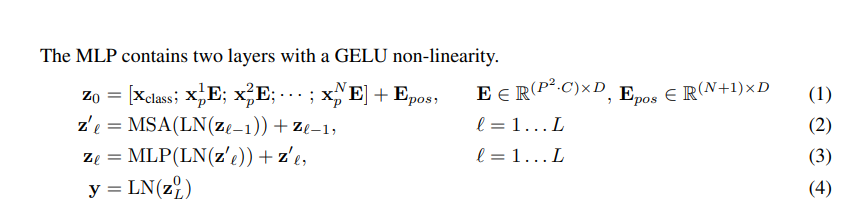

Activation function GELU()
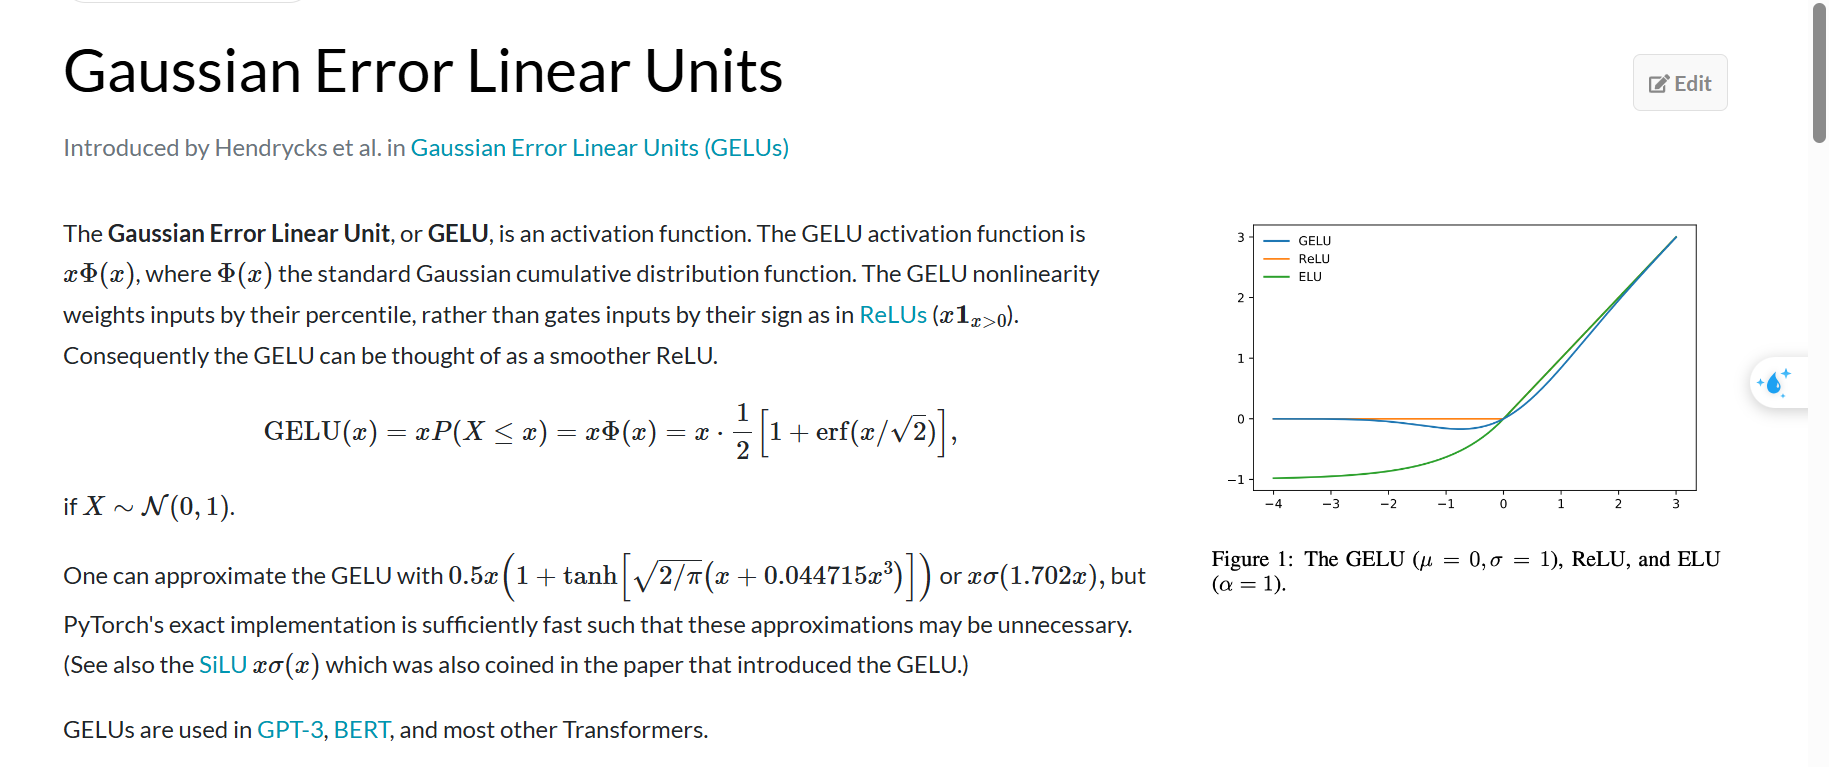

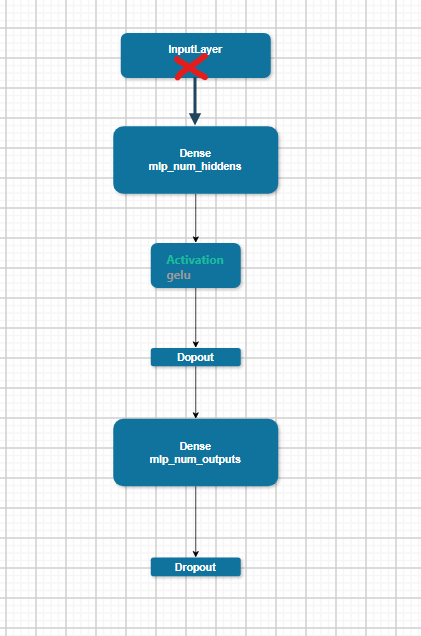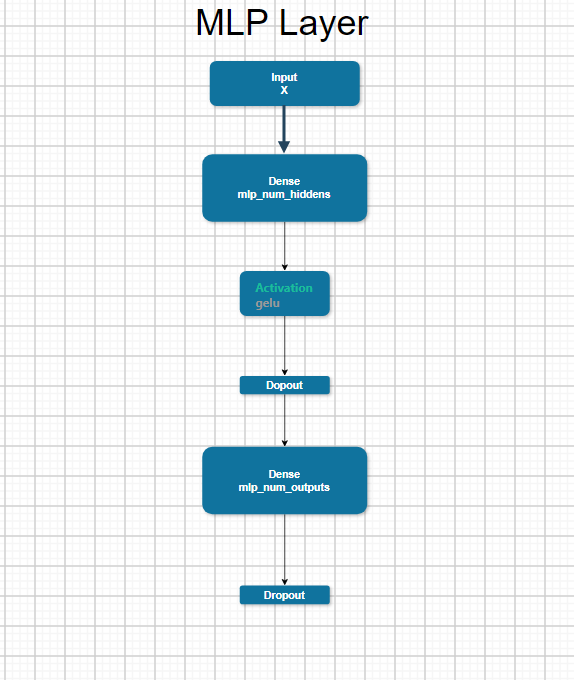

In [ ]:
class ViTMLP(nn.Module):
    def __init__(self, mlp_num_hiddens, mlp_num_outputs, dropout=0.5):
        super().__init__()
        self.dense1 = nn.LazyLinear(mlp_num_hiddens)
        self.gelu = nn.GELU()
        self.dropout1 = nn.Dropout(dropout)
        self.dense2 = nn.LazyLinear(mlp_num_outputs)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        return self.dropout2(self.dense2(self.dropout1(self.gelu(
            self.dense1(x)))))

Vision Transformer Block

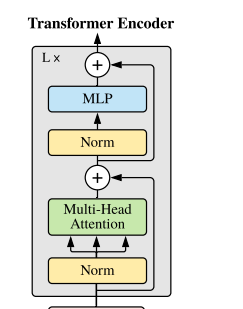

In [ ]:
# class ViTBlock(nn.Module):
#   def __init__(self, num_hiddens, norm_shape, mlp_num_hiddens, num_heads, dropout, use_bias=False):
#     super().__init__()
#     self.ln1 = nn.LayerNorm(norm_shape) # frequently in transformer norm_shapes = num_hiddens
#     self.attention = d2l.MultiHeadAttention(num_hiddens, num_heads, dropout, use_bias)
#     self.ln2 = nn.LayerNorm(norm_shape)
#     self.mlp = ViTMLP((mlp_num_hiddens, num_hiddens), dropout)

#   def forward(self, X, valid_lens=None):
#     X = X + self.attention(*([self.ln1(X)] * 3), valid_lens) # 3 input Queries Keys Values
#     return X + self.mlp(self.ln2(X))
class ViTBlock(nn.Module):
    def __init__(self, num_hiddens, norm_shape, mlp_num_hiddens,
                 num_heads, dropout, use_bias=False):
        super().__init__()
        self.ln1 = nn.LayerNorm(norm_shape)
        self.attention = d2l.MultiHeadAttention(num_hiddens, num_heads,
                                                dropout, use_bias)
        self.ln2 = nn.LayerNorm(norm_shape)
        self.mlp = ViTMLP(mlp_num_hiddens, num_hiddens, dropout)

    def forward(self, X, valid_lens=None):
        X = X + self.attention(*([self.ln1(X)] * 3), valid_lens)
        return X + self.mlp(self.ln2(X))


In [ ]:
X = torch.ones((2, 100, 24))
encoder_blk = ViTBlock(24, 24, 48, 8, 0.5)
encoder_blk.eval()


ViTBlock(
  (ln1): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
  (attention): MultiHeadAttention(
    (attention): DotProductAttention(
      (dropout): Dropout(p=0.5, inplace=False)
    )
    (W_q): LazyLinear(in_features=0, out_features=24, bias=False)
    (W_k): LazyLinear(in_features=0, out_features=24, bias=False)
    (W_v): LazyLinear(in_features=0, out_features=24, bias=False)
    (W_o): LazyLinear(in_features=0, out_features=24, bias=False)
  )
  (ln2): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
  (mlp): ViTMLP(
    (dense1): LazyLinear(in_features=0, out_features=48, bias=True)
    (gelu): GELU(approximate='none')
    (dropout1): Dropout(p=0.5, inplace=False)
    (dense2): LazyLinear(in_features=0, out_features=24, bias=True)
    (dropout2): Dropout(p=0.5, inplace=False)
  )
)

# Putting It All Together

 [Việc chuyển tiếp tầm nhìn của Transformers bên dưới rất đơn giản. Đầu tiên, hình ảnh đầu vào được đưa vào một phiên bản PatchEmbedding, đầu ra của phiên bản này được nối với phần nhúng mã thông báo “<cls>”. Chúng được tóm tắt bằng các phần nhúng vị trí có thể học được trước khi bỏ học. Sau đó, đầu ra được đưa vào bộ mã hóa Transformer để xếp chồng các phiên bản num_blks của lớp ViTBlock. Cuối cùng, người đứng đầu mạng sẽ trình bày mã thông báo “<cls>”.]

In [ ]:
class ViT(d2l.Classifier):
    def __init__(self, img_size, patch_size, num_hiddens, mlp_num_hiddens,
                 num_heads, num_blks, emb_dropout, blk_dropout, lr=0.1,
                 use_bias=False, num_classes=10):
      super().__init__()
      self.save_hyperparameters()
      self.patch_embedding = PatchEmbedding(
          img_size, patch_size, num_hiddens)
      self.cls_token = nn.Parameter(torch.zeros(1, 1, num_hiddens))
      num_steps = self.patch_embedding.num_patches + 1  # Add the cls token
      # Positional embeddings are learnable
      self.pos_embedding = nn.Parameter(torch.randn(1, num_steps, num_hiddens))
      self.dropout = nn.Dropout(emb_dropout)
      self.blks = nn.Sequential()
      for i in range(num_blks):
          self.blks.add_module(f"{i}", ViTBlock(
              num_hiddens, num_hiddens, mlp_num_hiddens,
              num_heads, blk_dropout, use_bias))
      self.head = nn.Sequential(nn.LayerNorm(num_hiddens),
                                nn.Linear(num_hiddens, num_classes))

    def forward(self, X):
        X = self.patch_embedding(X)
        X = torch.cat((self.cls_token.expand(X.shape[0], -1, -1), X), 1)
        X = self.dropout(X + self.pos_embedding)
        for blk in self.blks:
            X = blk(X)
        return self.head(X[:, 0])

In [ ]:
img_size, patch_size = 96, 16
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 512, 2048, 8, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.1
model = ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(img_size, img_size))
trainer.fit(model, data)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


KeyboardInterrupt: 

code trên kaggle : https://www.kaggle.com/code/phctuynl/tranformer-original/edit#Training

# Exercise  

Exercise trực quan ở : https://www.kaggle.com/code/phctuynl/tranformer-original/edit#Training